<a href="https://colab.research.google.com/github/Sercan1111/Titanic-Survival-Classification/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/train_titanic.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/test_titanic.csv')
train[:6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

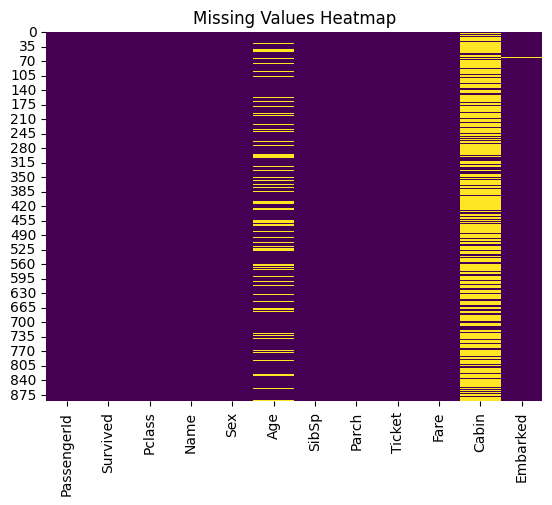

In [ ]:
# Veri setinin temel bilgilerini görüntüleme
print(train.info())

# Eksik değerlerin sayısını kontrol etme
missing_values = train.isnull().sum()
print(missing_values)

# Eksik değerlerin görselleştirilmesi
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
discrete_vars = []
continuous_vars = []

for col in train.columns:
    if train[col].dtype in ['int64', 'float64']:
        unique_values = train[col].nunique()
        if unique_values < 20:  # Ayrık değişkenler için bir eşik değeri
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)
    else:
        discrete_vars.append(col)

print("Discrete variables:", discrete_vars)
print("Continuous variables:", continuous_vars)

Discrete variables: ['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
Continuous variables: ['PassengerId', 'Age', 'Fare']


In [ ]:
train = train.drop(columns=['Name', 'Embarked', 'Cabin'])
test = test.drop(columns=['Name', 'Embarked', 'Cabin'])

# İlk birkaç satırı görüntüleme
print(train.head())
print(test.head())

KeyError: "['Name', 'Embarked', 'Cabin'] not found in axis"

In [ ]:
# 'Sex' sütununu 'is_female' olarak değiştirme
train['is_female'] = train['Sex'].map({'male': 0, 'female': 1})
test['is_female'] = test['Sex'].map({'male': 0, 'female': 1})

# 'Sex' sütununu düşürme
train = train.drop(columns=['Sex'])
test = test.drop(columns=['Sex'])

# İlk birkaç satırı görüntüleme
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  is_female  
0   7.2500          0  
1  71.2833          1  
2   7.9250          1  
3  53.1000          1  
4   8.0500          0  
   PassengerId  Pclass   Age  SibSp  Parch   Ticket     Fare  is_female
0          892       3  34.5      0      0   330911   7.8292          0
1          893       3  47.0      1      0   363272   7.0000          1
2          894       2  62.0      0      0   240276   9.6875          0
3          895       3  27.0      0      0   315154   8.6625          0
4          896       3  22.0      1      1  3101298

In [ ]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# İlk birkaç satırı görüntüleme
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0            1         0       3  22.0      1      0         A/5 21171   
1            2         1       1  38.0      1      0          PC 17599   
2            3         1       3  26.0      0      0  STON/O2. 3101282   
3            4         1       1  35.0      1      0            113803   
4            5         0       3  35.0      0      0            373450   

      Fare  is_female  
0   7.2500          0  
1  71.2833          1  
2   7.9250          1  
3  53.1000          1  
4   8.0500          0  
   PassengerId  Pclass   Age  SibSp  Parch   Ticket     Fare  is_female
0          892       3  34.5      0      0   330911   7.8292          0
1          893       3  47.0      1      0   363272   7.0000          1
2          894       2  62.0      0      0   240276   9.6875          0
3          895       3  27.0      0      0   315154   8.6625          0
4          896       3  22.0      1      1  3101298

In [ ]:
train = train.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])

# İlk birkaç satırı görüntüleme
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  is_female
0            1         0       3  22.0      1      0   7.2500          0
1            2         1       1  38.0      1      0  71.2833          1
2            3         1       3  26.0      0      0   7.9250          1
3            4         1       1  35.0      1      0  53.1000          1
4            5         0       3  35.0      0      0   8.0500          0
   PassengerId  Pclass   Age  SibSp  Parch     Fare  is_female
0          892       3  34.5      0      0   7.8292          0
1          893       3  47.0      1      0   7.0000          1
2          894       2  62.0      0      0   9.6875          0
3          895       3  27.0      0      0   8.6625          0
4          896       3  22.0      1      1  12.2875          1


In [ ]:
train = train.drop(columns=['PassengerId'])
test = test.drop(columns=['PassengerId'])

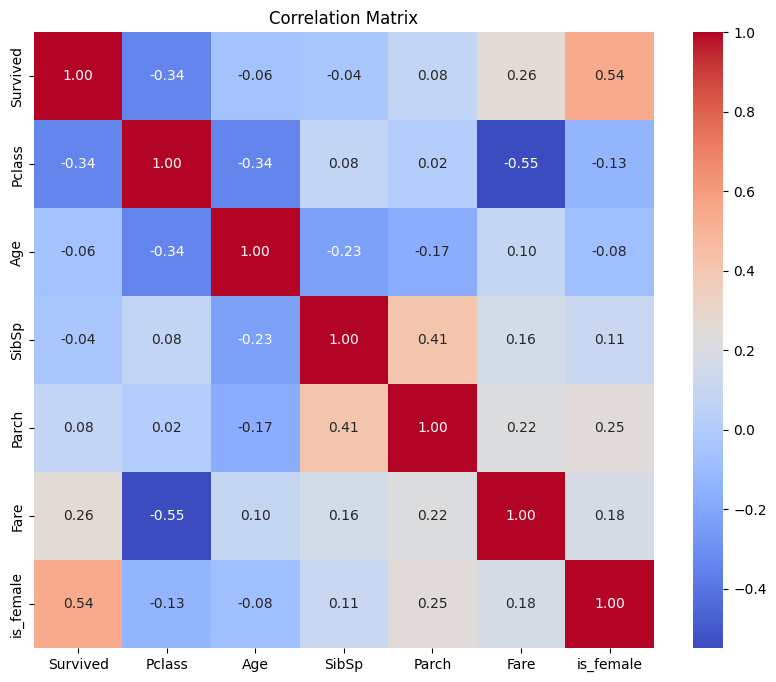

In [ ]:
# Korelasyon matrisini hesaplama
correlation_matrix = train.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(train.head())
print(test.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  is_female
0         0       3  22.0      1      0   7.2500          0
1         1       1  38.0      1      0  71.2833          1
2         1       3  26.0      0      0   7.9250          1
3         1       1  35.0      1      0  53.1000          1
4         0       3  35.0      0      0   8.0500          0
   Pclass   Age  SibSp  Parch     Fare  is_female
0       3  34.5      0      0   7.8292          0
1       3  47.0      1      0   7.0000          1
2       2  62.0      0      0   9.6875          0
3       3  27.0      0      0   8.6625          0
4       3  22.0      1      1  12.2875          1


Discrete variables: ['Survived', 'Pclass', 'SibSp', 'Parch', 'is_female']
Continuous variables: ['Age', 'Fare']


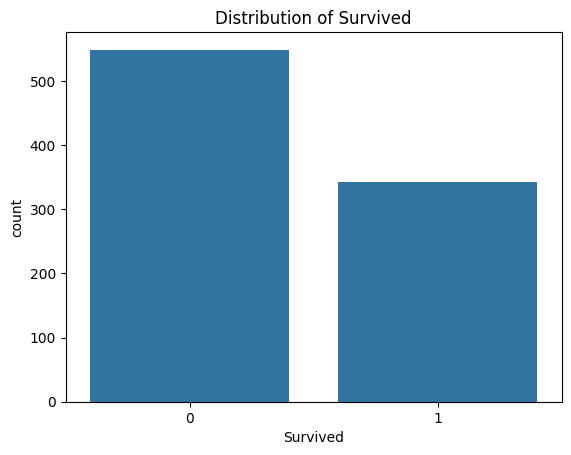

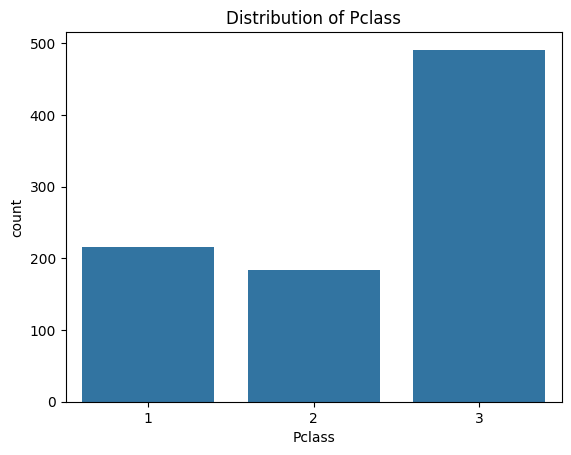

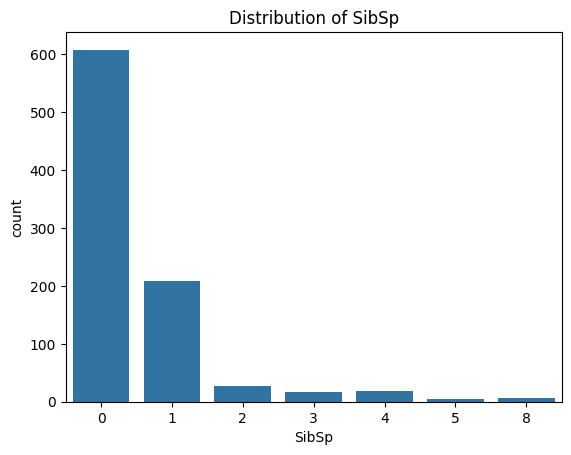

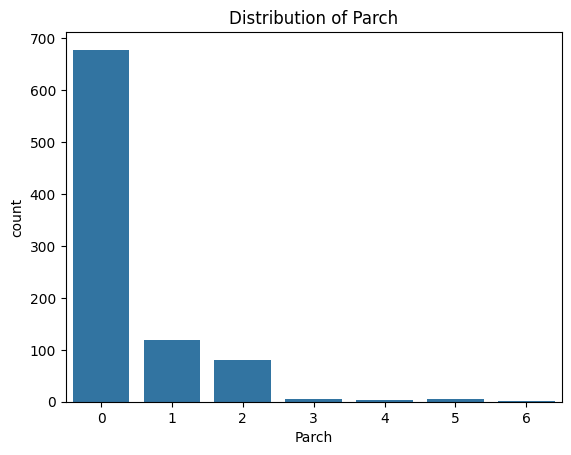

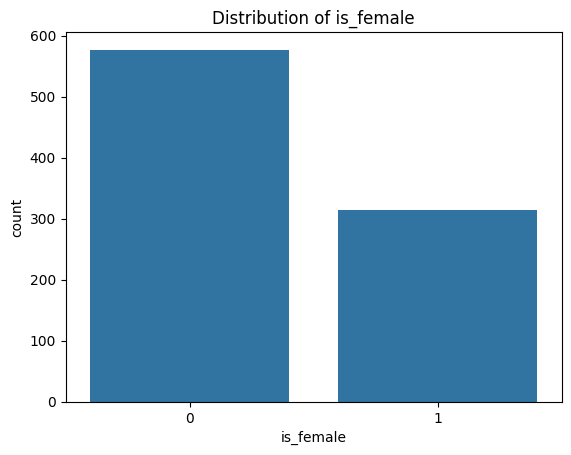

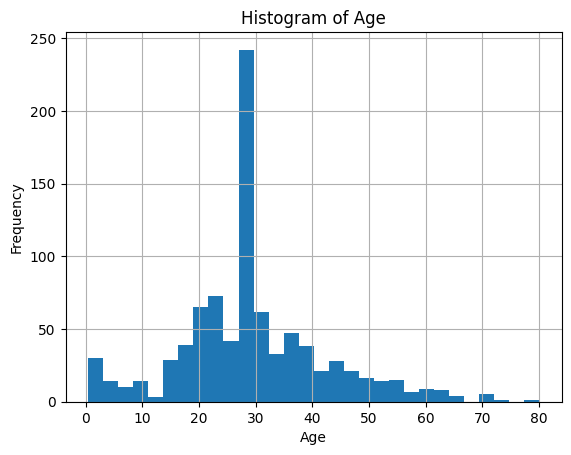

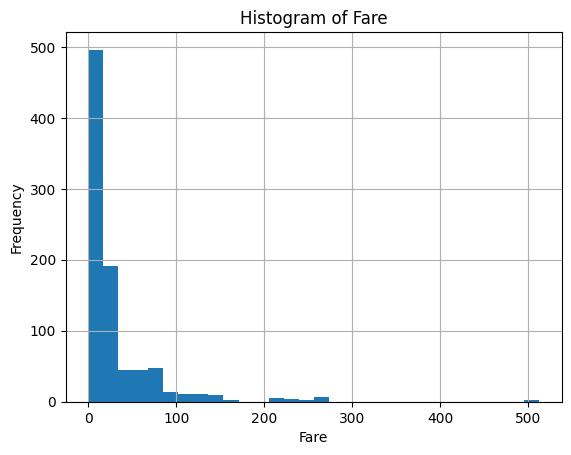

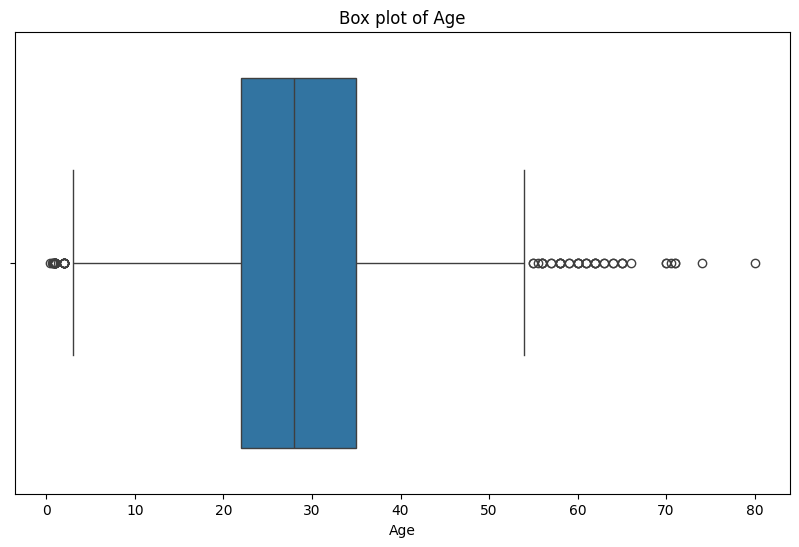

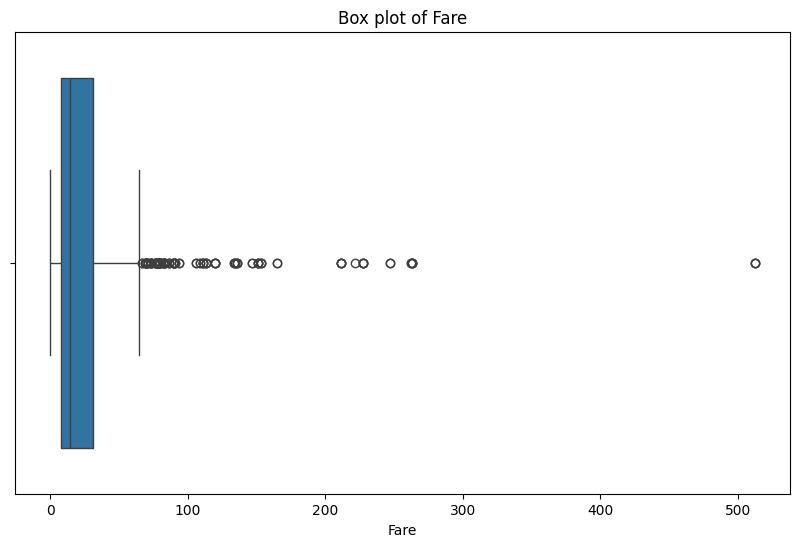

In [ ]:
# Ayrık ve sürekli değişkenleri tespit etme
discrete_vars = []
continuous_vars = []

for col in train.columns:
    if train[col].dtype in ['int64', 'float64']:
        unique_values = train[col].nunique()
        if unique_values < 20:  # Ayrık değişkenler için bir eşik değeri
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)
    else:
        discrete_vars.append(col)

print("Discrete variables:", discrete_vars)
print("Continuous variables:", continuous_vars)

# Kategorik değişkenler için bar plot oluşturma
for feature in discrete_vars:
    sns.countplot(x=feature, data=train)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Sürekli değişkenler için histogram oluşturma
for feature in continuous_vars:
    train[feature].hist(bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Outlier'ları görmek için box plot oluşturma
for feature in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

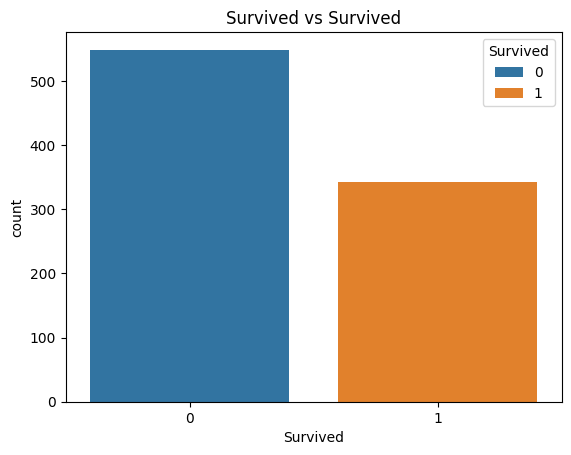

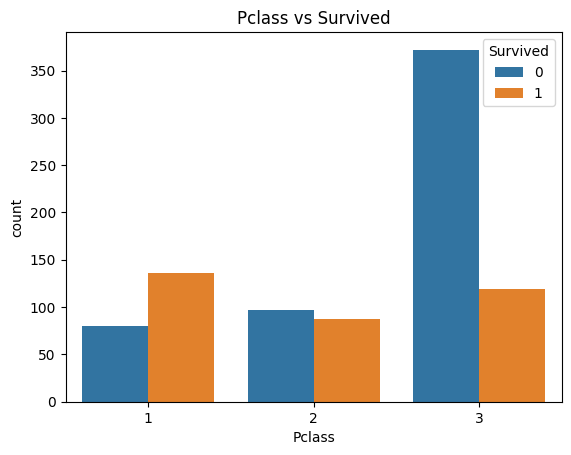

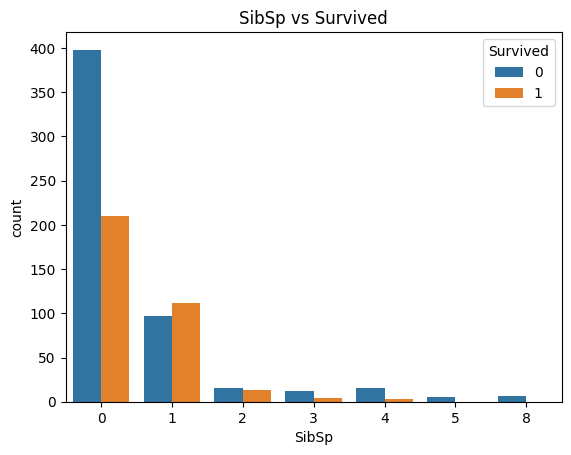

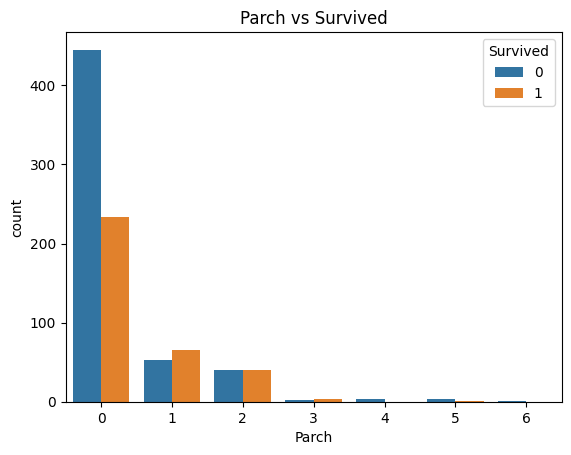

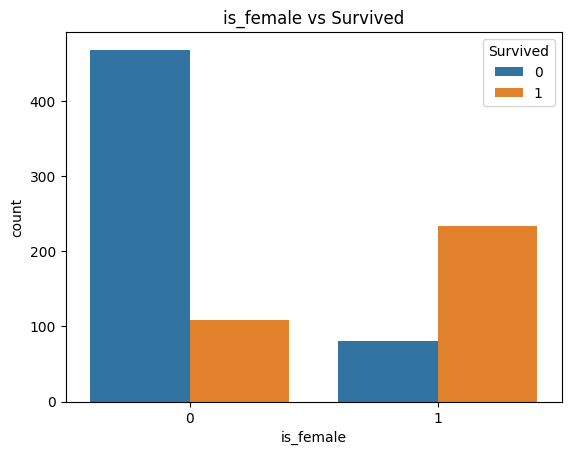

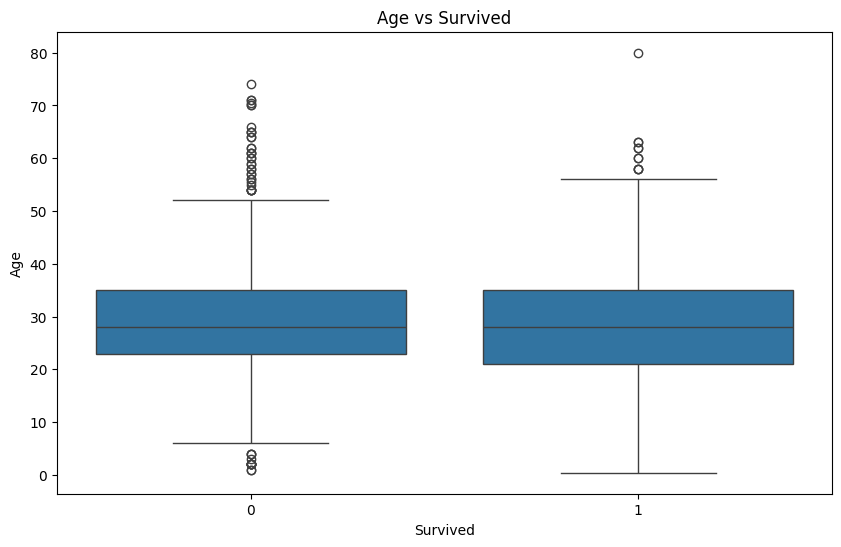

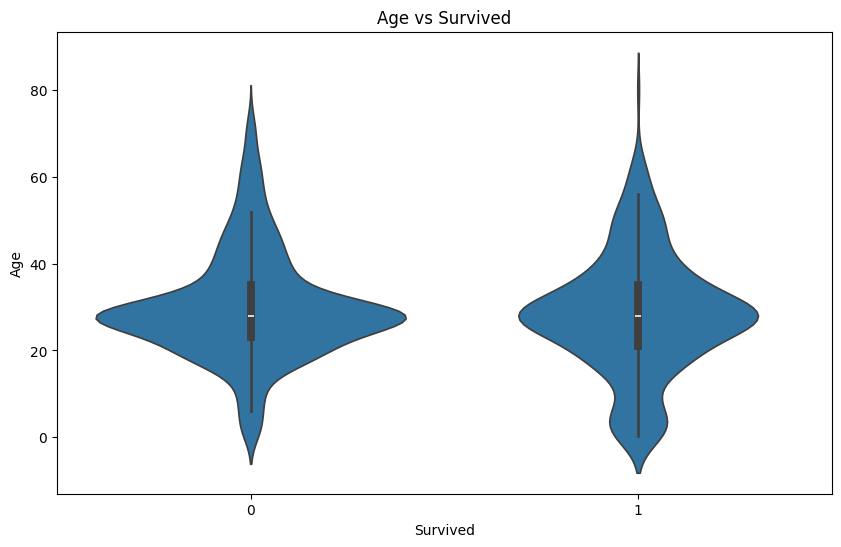

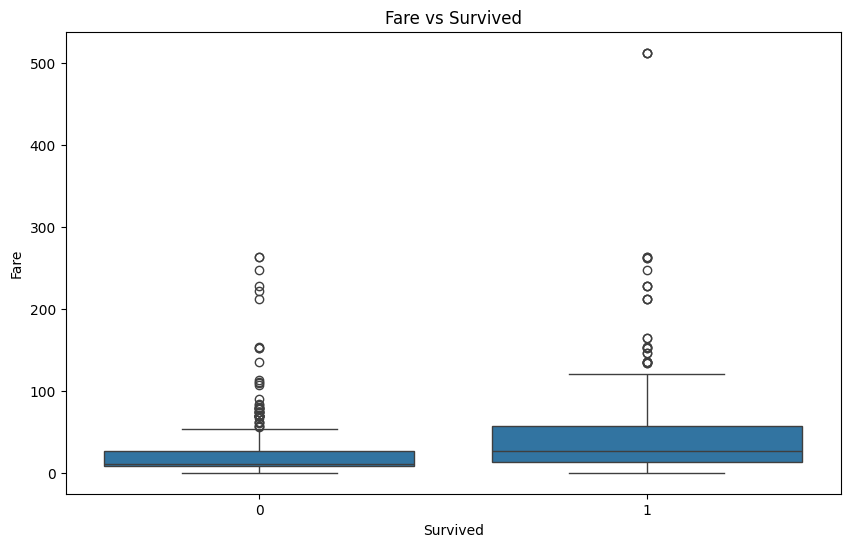

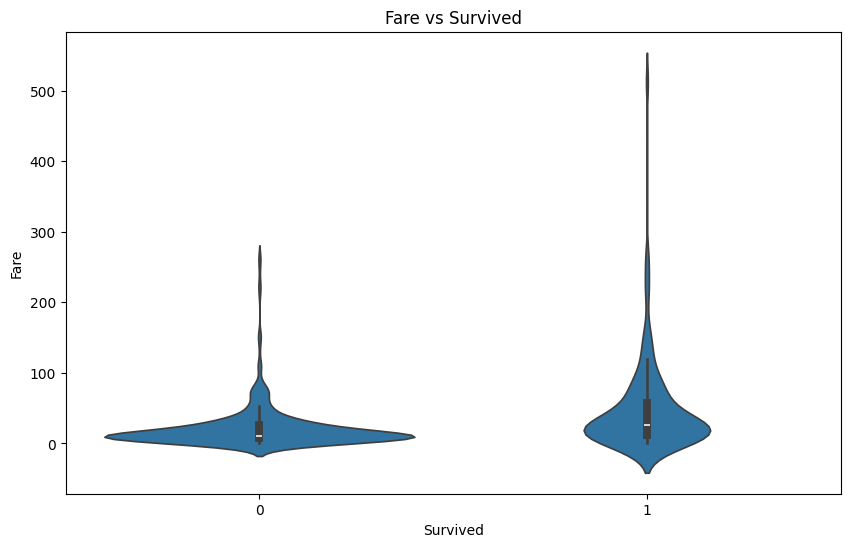

In [ ]:
# Kategorik değişkenler için bar plot oluşturma
for feature in discrete_vars:
    sns.countplot(x=feature, hue='Survived', data=train)
    plt.title(f'{feature} vs Survived')
    plt.show()

# Sürekli değişkenler için box plot ve violin plot oluşturma
for feature in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Survived', y=feature, data=train)
    plt.title(f'{feature} vs Survived')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Survived', y=feature, data=train)
    plt.title(f'{feature} vs Survived')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Bağımsız ve bağımlı değişkenleri belirleme
X = train.drop('Survived', axis=1)
y = train['Survived']

# Eğitim ve test setlerine bölme
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[90 15]
 [19 55]]


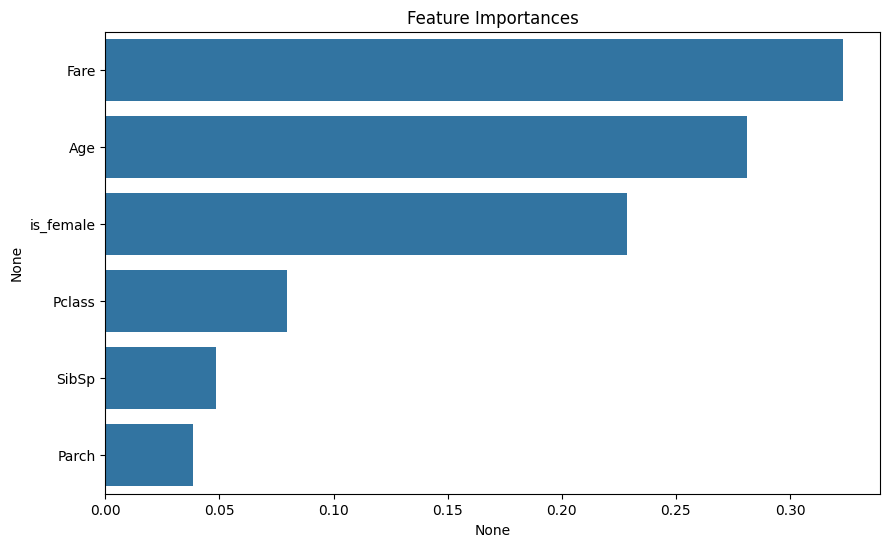

In [ ]:
# Random Forest modelini oluşturma ve eğitme
model = RandomForestClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_val)

# Modeli değerlendirme
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

# Özellik önem derecelerini görselleştirme
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()


Node count: 333
Feature: 5
Threshold: 0.5
Impurity (Entropy): 0.9554629988004849
Number of samples at the root: 712


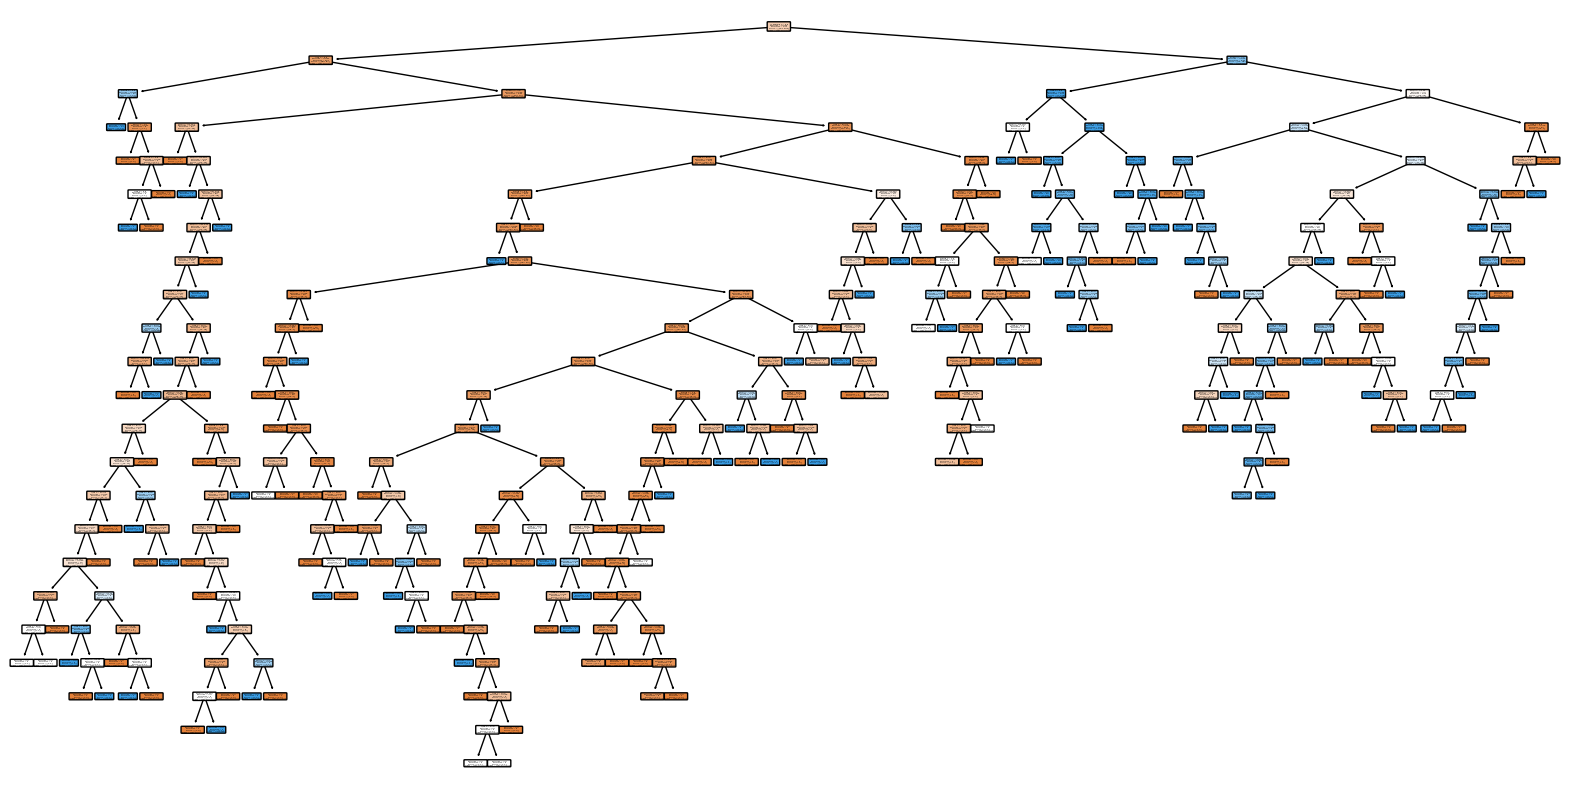

Information Gain at the root: 0.4726


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# Tek bir karar ağacı oluşturma
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

# Kök düğümdeki Entropy hesaplama
node_count = tree_model.tree_.node_count
feature = tree_model.tree_.feature
threshold = tree_model.tree_.threshold
impurity = tree_model.tree_.impurity
n_node_samples = tree_model.tree_.n_node_samples
weighted_n_node_samples = tree_model.tree_.weighted_n_node_samples

print(f'Node count: {node_count}')
print(f'Feature: {feature[0]}')
print(f'Threshold: {threshold[0]}')
print(f'Impurity (Entropy): {impurity[0]}')
print(f'Number of samples at the root: {n_node_samples[0]}')

# Karar ağacını görselleştirme
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

# Information Gain hesaplama
def information_gain(parent_impurity, left_impurity, right_impurity, left_weight, right_weight):
    return parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)

parent_impurity = impurity[0]
left_impurity = impurity[1]
right_impurity = impurity[2]
left_weight = weighted_n_node_samples[1] / weighted_n_node_samples[0]
right_weight = weighted_n_node_samples[2] / weighted_n_node_samples[0]

info_gain = information_gain(parent_impurity, left_impurity, right_impurity, left_weight, right_weight)
print(f'Information Gain at the root: {info_gain:.4f}')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200,250,300,350],
    'max_depth': [None, 5,8,10],
    'min_samples_split': [10,15,20,50],
    'min_samples_leaf': [2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', random_state=42),
                           param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best precision score: {grid_search.best_score_}')

best_model = grid_search.best_estimator_

# Tahmin yapma
y_pred = best_model.predict(X_val)

# Modeli değerlendirme
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 300}
Best precision score: 0.856068376068376
Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

[[95 10]
 [25 49]]


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

clf1 = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300, random_state=42)
clf2 = GradientBoostingClassifier(random_state=42)
clf3 = LogisticRegression(random_state=42)

ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('gb', clf2), ('lr', clf3)], voting='soft')
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

[[94 11]
 [24 50]]
